<a href="https://colab.research.google.com/github/derek-shing/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Supreme_data_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import session

import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
!pip install seaborn==0.9.0

In [2]:
#Loading data 
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Loading data and joining the table

In [0]:
product_df=pd.read_csv('/content/gdrive/My Drive/product_final.csv')

In [0]:
resell_df=pd.read_csv('/content/gdrive/My Drive/resell18_final.csv')

In [6]:
resell_df.shape

(4141, 4)

In [7]:
resell_df.head()

,Unnamed: 0,name,full,resell_price
0,2611.0,Supreme®/Pilot Marker,Supreme PilotMarker Red,19.0
1,2612.0,Supreme®/Pilot Marker,Supreme PilotMarker Black,19.0
2,2609.0,Payphone Keychain,Supreme PayphoneKeychain Red,20.0
3,2610.0,Payphone Keychain,Supreme PayphoneKeychain Blue,23.0
4,2600.0,Reflective Keychain,Supreme ReflectiveKeychain Silver,24.0


In [8]:
product_df.shape

(829, 4)

In [0]:
new_df = pd.merge(resell_df,product_df, how='inner', on='name')

In [9]:
new_df.head()

,Unnamed: 0,name,full,resell_price,desc,price,release_date
0,2611.0,Supreme®/Pilot Marker,Supreme PilotMarker Red,19.0,Broad tip permanent marker with printed logo o...,10,2018-10-11
1,2612.0,Supreme®/Pilot Marker,Supreme PilotMarker Black,19.0,Broad tip permanent marker with printed logo o...,10,2018-10-11
2,2609.0,Payphone Keychain,Supreme PayphoneKeychain Red,20.0,Metal keychain with debossed enamel graphic on...,14,2018-08-30
3,2610.0,Payphone Keychain,Supreme PayphoneKeychain Blue,23.0,Metal keychain with debossed enamel graphic on...,14,2018-08-30
4,2600.0,Reflective Keychain,Supreme ReflectiveKeychain Silver,24.0,3M® Reflective keychain with printed logos on ...,14,2018-09-20


## Adding 3 feature on each product


1.   Increase in price in dollar amount
2.   Increase in price in percentage
3.   Color





In [0]:
new_df['increase']=new_df['resell_price']-new_df['price']

In [0]:
new_df['Percentage']=new_df['resell_price']/new_df['price']-1

In [12]:
new_df.shape

(4231, 9)

In [0]:
new_df['s']=new_df['full'].str.split()

In [0]:
new_df.head()

In [0]:
def isSupreme(l):
  return 'Supreme'in l

def color(l):
  return l[-1]

def color_to_other(c):
  if c in (clist):
    return c
  else:
    return 'Other'

In [0]:
##Try to extract color

new_df['color']=new_df['s'].apply(color)
clist=new_df['color'].value_counts().head(20).index.tolist()

In [0]:
new_df['color']=new_df['color'].apply(color_to_other)

In [0]:
new_df['color'].value_counts()

In [0]:
final.groupby('color')['Percentage'].mean()

In [0]:
final[final['color']=='Pink']

In [0]:
final = new_df[new_df['s'].apply(isSupreme)]

In [19]:
final.shape

(4105, 11)

## Visualize the data

In [0]:
product_df[~product_df['name'].isin(resell_df['name'])].sort_values('price', ascending=False)

In [0]:
idx=final.groupby('name')['increase'].idxmax()

In [0]:
top20 = final.loc[idx].sort_values(by='increase', ascending=False).head(20)

In [0]:
idx2=final.groupby('name')['Percentage'].idxmax()
top20_p = final.loc[idx].sort_values(by='Percentage', ascending=False).head(20)

### Plot top 20 products with the most profit


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


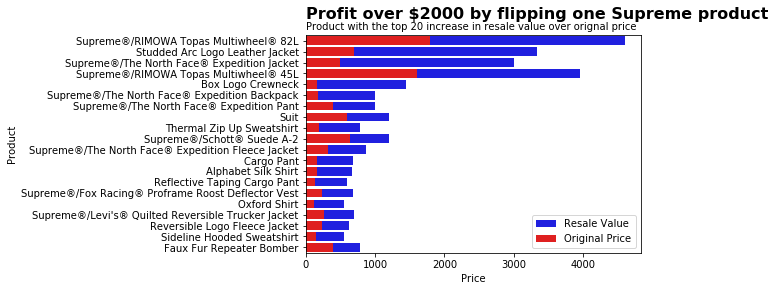

In [29]:
ax=sns.barplot(y='name',x='resell_price', data=top20, color='b', label='Resale Value')
sns.barplot(y='name',x='price', data=top20, color='r', label='Original Price')
plt.legend()
plt.ylabel('Product')
plt.xlabel('Price')
ax.text(x=-2,y=-2,s="Profit over $2000 by flipping one Supreme product", fontsize=16,fontweight='bold')
ax.text(x=-2,y=-1,s="Product with the top 20 increase in resale value over orignal price");


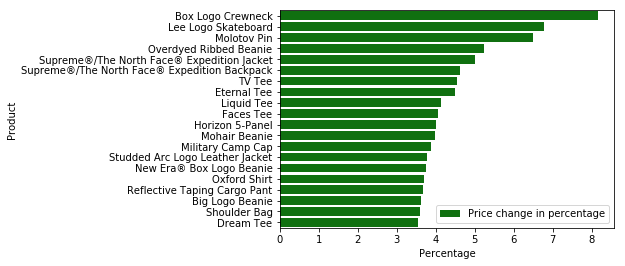

In [33]:
sns.barplot(y='name',x='Percentage', data=top20_p, color='g', label='Price change in percentage')
plt.legend()
plt.ylabel('Product')
plt.xlabel('Percentage');


In [0]:
sns.scatterplot(y='name',x='color', data=final, hue='increase')
plt.ylabel('Product')
plt.xlabel('Color')



In [37]:
final.head(1)

,Unnamed: 0,name,full,resell_price,desc,price,release_date,increase,Percentage,s,color
0,2611.0,Supreme®/Pilot Marker,Supreme PilotMarker Red,19.0,Broad tip permanent marker with printed logo o...,10,2018-10-11,9.0,0.9,"[Supreme, PilotMarker, Red]",Red


In [42]:
final.release_date = pd.to_datetime(final.release_date)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [51]:
final['month']=final.release_date.dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
final

In [0]:
top_selling = final.loc[idx].sort_values(by='increase', ascending=False)

In [0]:
top_selling.sort_values(by='increase')

In [0]:
condition = top_selling.increase>100

In [24]:
len(top_selling[condition])

173

In [0]:
total_earn_by_month=top_selling[condition].groupby('month').increase.sum()

In [0]:
total_earn_by_month=pd.DataFrame(total_earn_by_month)

In [0]:
total_earn_by_month= total_earn_by_month.reset_index()

Text(0.5, 1.0, 'Profit on each month')

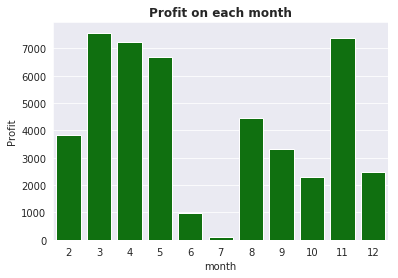

In [98]:
ax=sns.barplot(x='month',y='increase',data=total_earn_by_month, color = 'g')
ax=sns.set_style("darkgrid")
plt.ylabel('Profit')
plt.title('Profit on each month' ,fontweight="bold" )

## Getting band name


In [0]:
product_df.name

In [0]:
def joinband(name):
  return '®' in name

In [0]:
bandname=final[final.name.apply(joinband)]

In [0]:
bandname

In [36]:
bandname['list']=bandname.name.str.split('®')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
bandname.list

In [25]:
bandname['bandsplit']=bandname.name.str.split('®')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
bandname

In [0]:
brandlist=[]

for name in bandname.list:
  brandlist=brandlist+name

In [39]:
len(brandlist)

1808

In [0]:
from collections import Counter
brandlist=Counter(brandlist)

In [0]:
brandlist